# **1: Load the Dataset and Perform EDA (Exploratory Data Analysis)**

In [3]:
#Load the Dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the first 5000 rows of the dataset
df = pd.read_csv('uci-news-aggregator.csv', nrows=5000)

# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         5000 non-null   int64  
 1   TITLE      5000 non-null   object 
 2   URL        5000 non-null   object 
 3   PUBLISHER  4999 non-null   object 
 4   CATEGORY   5000 non-null   object 
 5   STORY      5000 non-null   object 
 6   HOSTNAME   5000 non-null   object 
 7   TIMESTAMP  5000 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 312.6+ KB
None
   ID                                              TITLE  \
0   1  Fed official says weak data caused by weather,...   
1   2  Fed's Charles Plosser sees high bar for change...   
2   3  US open: Stocks fall after Fed official hints ...   
3   4  Fed risks falling 'behind the curve', Charles ...   
4   5  Fed's Plosser: Nasty Weather Has Curbed Job Gr...   

                                                 URL          PU

In [4]:
# Check for missing values
print(df.isnull().sum())

ID           0
TITLE        0
URL          0
PUBLISHER    1
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64


In [5]:
# Check for unique values in categorical columns
print(df['PUBLISHER'].nunique(), df['CATEGORY'].nunique(), df['STORY'].nunique())

1733 4 67


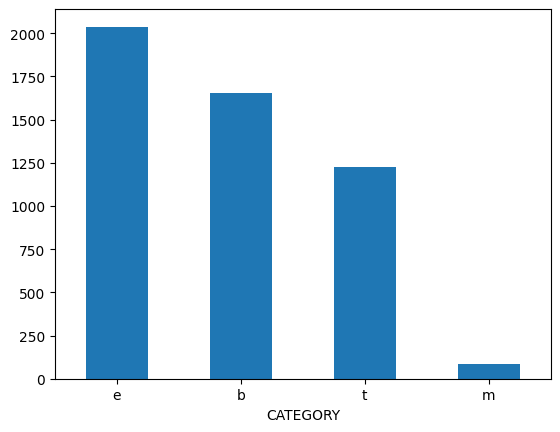

In [6]:
# Distribution of categories
df['CATEGORY'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

# Pre-processing
Text Cleaning: Removing punctuation, stopwords, and performing tokenization.
Lemmatization: Convert words to their base forms.


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
stop_words = set(stopwords.words('english'))

In [9]:
# Function to clean and tokenize text
def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords and short words
    words = [word for word in words if word not in stop_words and len(word) > 2]
    return words

In [10]:
# Apply preprocessing to the 'TITLE' column
df['processed_title'] = df['TITLE'].apply(preprocess)

## **2. Using the LDA Algorithm to Create Topics**

In [11]:
import gensim
from gensim import corpora

In [12]:
# Create a dictionary and corpus
dictionary = corpora.Dictionary(df['processed_title'])
corpus = [dictionary.doc2bow(text) for text in df['processed_title']]

In [13]:
# Apply LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

In [14]:
# Print topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.050*"bachelor" + 0.043*"juan" + 0.040*"pablo" + 0.034*"season" + 0.032*"bieber"')
(1, '0.037*"snowden" + 0.026*"sxsw" + 0.025*"bank" + 0.020*"england" + 0.019*"carney"')
(2, '0.018*"lindsay" + 0.017*"market" + 0.016*"chiquita" + 0.015*"penney" + 0.015*"loss"')
(3, '0.030*"american" + 0.021*"missing" + 0.021*"eagle" + 0.015*"ukraine" + 0.012*"search"')
(4, '0.046*"miley" + 0.045*"cyrus" + 0.025*"2014" + 0.020*"neil" + 0.016*"music"')
(5, '0.054*"bossy" + 0.043*"ban" + 0.026*"lena" + 0.025*"beyonce" + 0.023*"dunham"')
(6, '0.021*"gox" + 0.020*"bankruptcy" + 0.019*"files" + 0.019*"bitcoin" + 0.019*"mark"')
(7, '0.040*"colorado" + 0.023*"stocks" + 0.023*"oil" + 0.023*"pot" + 0.022*"china"')
(8, '0.034*"taxes" + 0.025*"game" + 0.024*"thrones" + 0.024*"titanfall" + 0.020*"trailer"')
(9, '0.028*"stacy" + 0.028*"keibler" + 0.023*"google" + 0.021*"george" + 0.017*"public"')


## **3. Compute the Coherence Score and Print Topics Extracted**

In [15]:
from gensim.models.coherencemodel import CoherenceModel

In [16]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['processed_title'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')

Coherence Score: 0.4530431335630323


In [17]:
# Print the extracted topics
topics = lda_model.show_topics(formatted=False)
for topic in topics:
    print(f'Topic {topic[0]}: {[word for word, _ in topic[1]]}')

Topic 0: ['bachelor', 'juan', 'pablo', 'season', 'bieber', 'justin', 'finale', 'selena', 'galavis', 'gomez']
Topic 1: ['snowden', 'sxsw', 'bank', 'england', 'carney', 'edward', 'parents', 'apple', 'says', 'ios']
Topic 2: ['lindsay', 'market', 'chiquita', 'penney', 'loss', 'swift', 'news', 'taylor', 'outfitters', 'inc']
Topic 3: ['american', 'missing', 'eagle', 'ukraine', 'search', 'night', 'house', 'still', 'stocks', 'plane']
Topic 4: ['miley', 'cyrus', '2014', 'neil', 'music', 'underwear', 'true', 'performs', 'detective', 'young']
Topic 5: ['bossy', 'ban', 'lena', 'beyonce', 'dunham', 'campaign', 'girls', 'carney', 'sheryl', 'word']
Topic 6: ['gox', 'bankruptcy', 'files', 'bitcoin', 'mark', 'recap', 'voice', 'live', 'new', 'cosmos']
Topic 7: ['colorado', 'stocks', 'oil', 'pot', 'china', 'sales', 'marijuana', 'million', 'month', 'data']
Topic 8: ['taxes', 'game', 'thrones', 'titanfall', 'trailer', 'watch', 'one', 'new', 'scandal', 'gas']
Topic 9: ['stacy', 'keibler', 'google', 'george'

## **4. Visualize the Topics**

In [19]:
from wordcloud import WordCloud

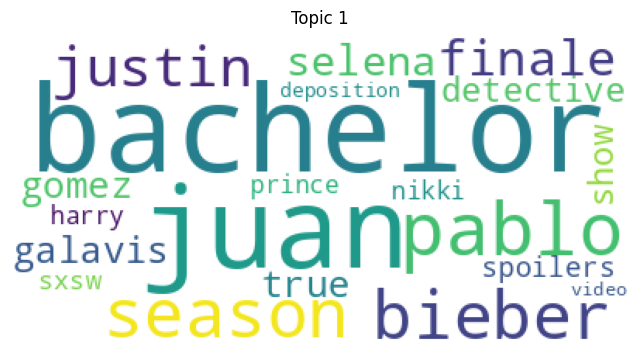

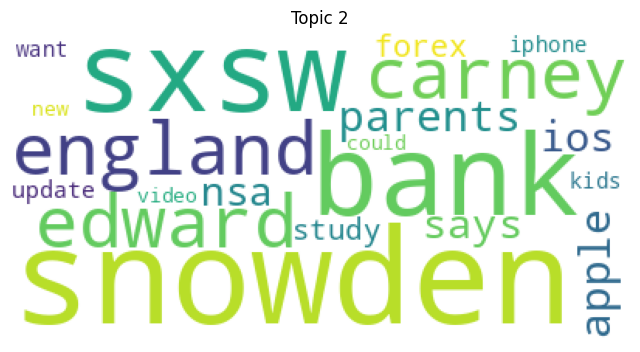

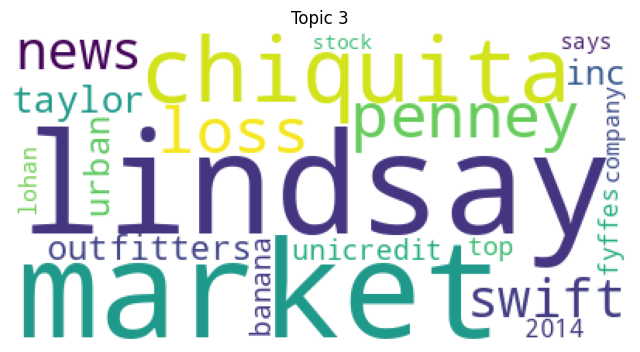

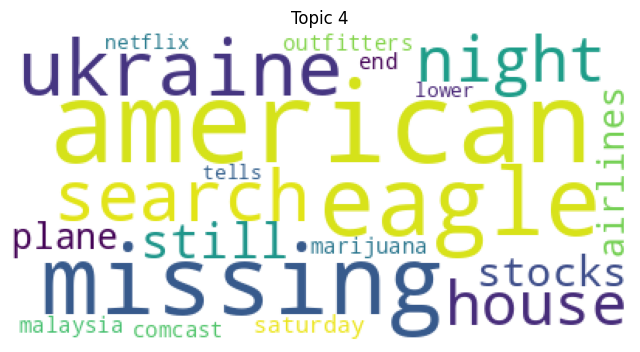

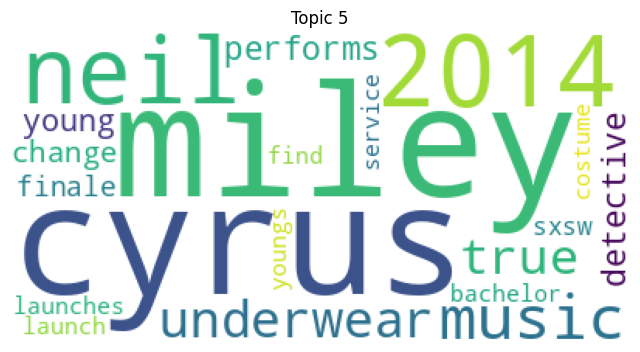

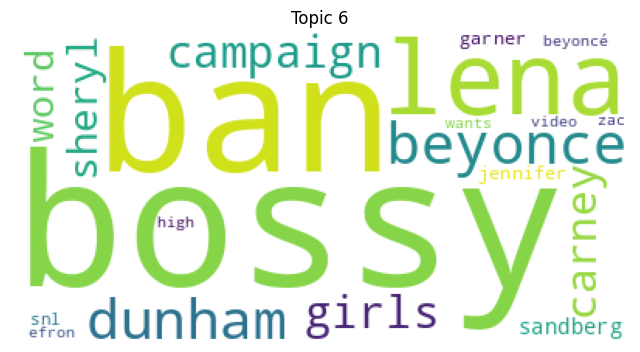

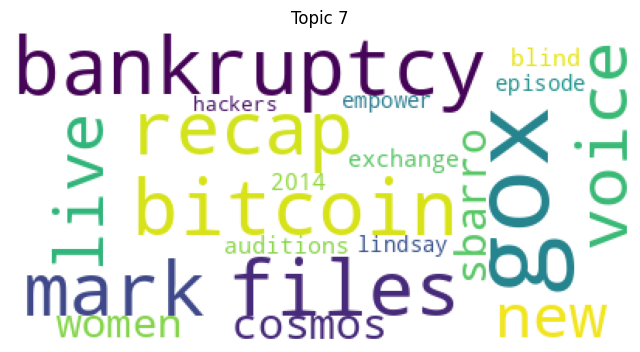

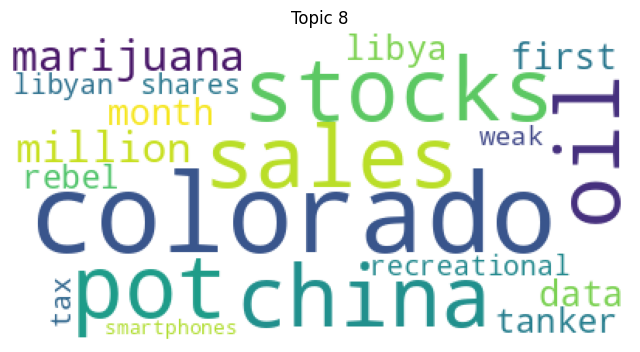

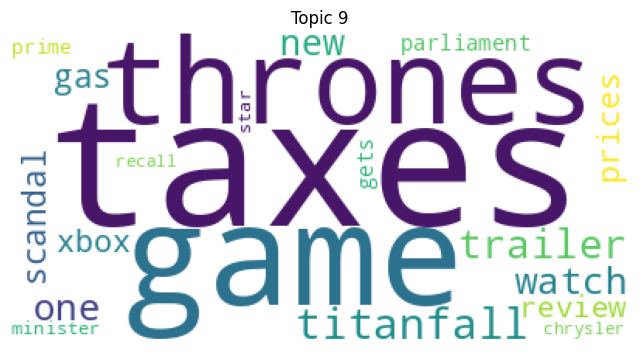

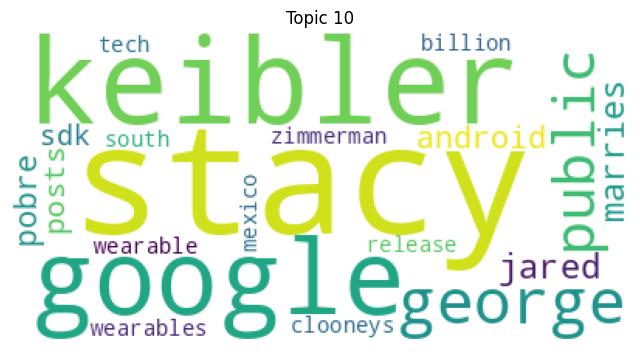

In [21]:
# Create a word cloud for each topic
for i in range(10):  # Assuming we have 10 topics
    plt.figure(figsize=(8, 8))
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(i, 20))))
    plt.axis("off")
    plt.title(f"Topic {i+1}")
    plt.subplots_adjust(hspace=1)
    plt.show()

## **5. Plot the Dependency Parser for Two Random Sentences**

In [22]:
import spacy
import random
from spacy import displacy

In [23]:
# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load('en_core_web_sm')

In [24]:
# Select two random sentences with at least 10 words
long_sentences = df['TITLE'].apply(lambda x: len(x.split()) >= 10)
sentences = df[long_sentences]['TITLE'].sample(2).tolist()

In [25]:
# Parse the sentences and visualize dependency
for sentence in sentences:
    doc = nlp(sentence)
    displacy.render(doc, style='dep', jupyter=True, options={'distance': 120,'color':'blue','compact':True})